In [1]:
import os, pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

In [2]:
data_folder = "/u/scratch/z/zhengton/CS263/output/"

In [3]:
model_to_name = {'bert': "BERT", 'bigbird': 'BigBird', 'longformer': 'LongFormer'}

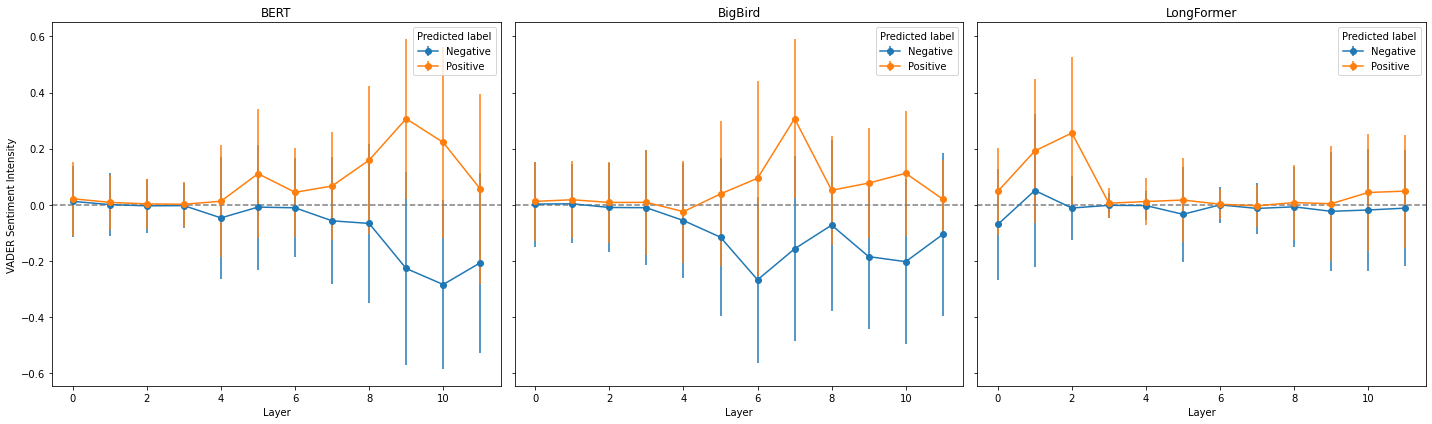

In [36]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
for k, (model, name) in enumerate(model_to_name.items()):
    plt.sca(ax[k])
    with open(f"{data_folder}/{model}_imdb_test_results.pickle", 'rb') as f:
        results = pickle.load(f)

    negative_examples = []
    positive_examples = []
    for result in results:
        predicted = result['prediction'].argmax().item()
        if predicted == 1:
            positive_examples.append(result['max_token_sentiment_scores'])
        else:
            negative_examples.append(result['max_token_sentiment_scores'])
    
    plt.errorbar(np.arange(12), y=np.array(negative_examples).mean(axis=0),
                yerr=np.array(negative_examples).std(axis=0), fmt='o-', label='Negative')
    plt.errorbar(np.arange(12), y=np.array(positive_examples).mean(axis=0),
                yerr=np.array(positive_examples).std(axis=0), fmt='o-', label='Positive')
    plt.axhline(0, linestyle='--', color='gray')
    plt.legend(title='Predicted label')
    plt.xlabel('Layer')
    if k == 0:
        plt.ylabel('VADER Sentiment Intensity')
    plt.title(f'{name}')
plt.tight_layout()
plt.savefig(f'{data_folder}/imdb_sentiment_scores.png', bbox_inches='tight', dpi=300, facecolor='white')

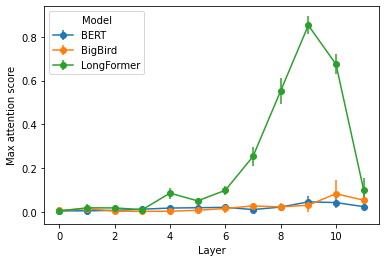

In [41]:
for model, name in model_to_name.items():
    with open(f"{data_folder}/{model}_imdb_test_results.pickle", 'rb') as f:
        results = pickle.load(f)
        
    att_scores = []
    for result in results:
        att_score = result['max_tokens_attention_scores']
        att_scores.append(att_score)
    att_scores = np.array(att_scores)
    plt.errorbar(np.arange(12), y=att_scores.mean(axis=0), yerr=att_scores.std(axis=0), fmt='o-', label=name)
plt.xlabel('Layer')
plt.ylabel('Max attention score')
plt.legend(title='Model')
plt.savefig(f'{data_folder}/imdb_attention_scores.png', bbox_inches='tight', dpi=300, facecolor='white')

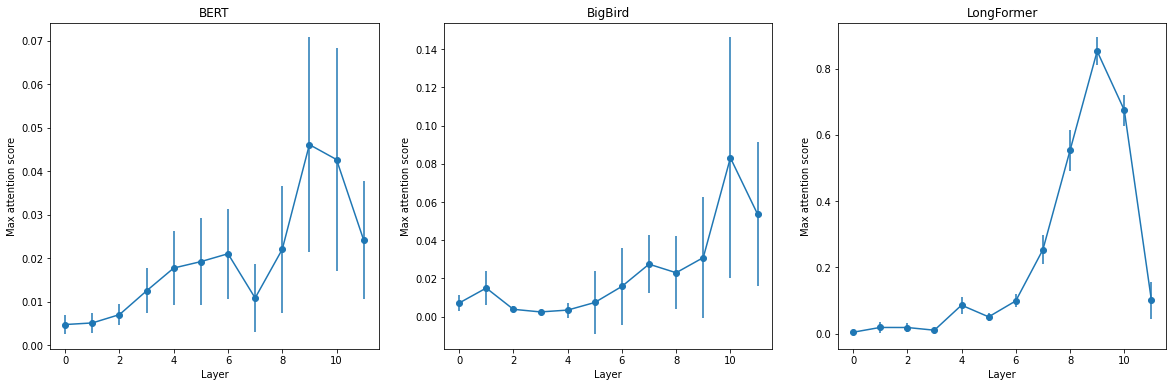

In [45]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
for k, (model, name) in enumerate(model_to_name.items()):
    plt.sca(ax[k])
    with open(f"{data_folder}/{model}_imdb_test_results.pickle", 'rb') as f:
        results = pickle.load(f)
        
    att_scores = []
    for result in results:
        att_score = result['max_tokens_attention_scores']
        att_scores.append(att_score)
    att_scores = np.array(att_scores)
    plt.errorbar(np.arange(12), y=att_scores.mean(axis=0), yerr=att_scores.std(axis=0), fmt='o-')
    plt.title(name)
    plt.xlabel('Layer')
    plt.ylabel('Max attention score')
plt.savefig(f'{data_folder}/imdb_attention_scores_separate.png', bbox_inches='tight', dpi=300, facecolor='white')

In [26]:
bert_concat_max_cls_attentions = np.load(f"{data_folder}/bert_concat_max_cls_attentions_2.npz")["arr_0"]
bert_concat_max_cls_attentions.shape

(1502, 12, 12)

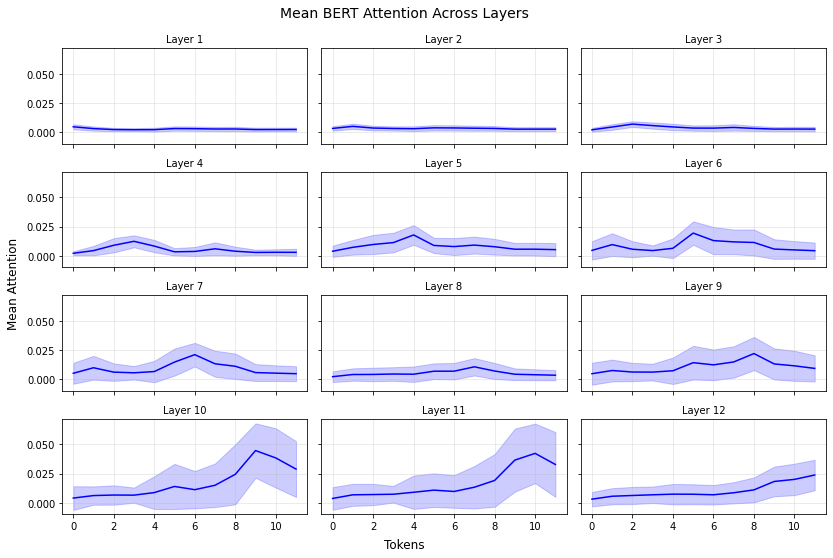

In [27]:
num_samples = 7500
bert_max_cls_att = bert_concat_max_cls_attentions[:num_samples, :, :]
mean_bert_max_cls_att = bert_max_cls_att.mean(axis=0)
std_bert_max_cls_att = bert_max_cls_att.std(axis=0)


# Plot
fig, axes = plt.subplots(4, 3, figsize=(12, 8), sharex=True, sharey=True)
axes = axes.flatten()

for k in range(12):
    ax = axes[k]
    ax.plot(
        np.arange(12),
        mean_bert_max_cls_att[k, :],
        label=f"Layer {k + 1}",
        color="blue",
    )
    ax.fill_between(
        np.arange(12),
        mean_bert_max_cls_att[k, :] - std_bert_max_cls_att[k, :],
        mean_bert_max_cls_att[k, :] + std_bert_max_cls_att[k, :],
        color="blue",
        alpha=0.2,
    )
    ax.set_title(f"Layer {k + 1}", fontsize=10)
    ax.grid(alpha=0.3)

# Add overall labels and adjust
fig.text(0.5, 0.04, "Tokens", ha="center", fontsize=12)
fig.text(0.04, 0.5, "Mean Attention", va="center", rotation="vertical", fontsize=12)
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
plt.suptitle("Mean BERT Attention Across Layers", fontsize=14)
plt.savefig(f'{data_folder}/bert_imdb_attention_over_layers.png', bbox_inches='tight', dpi=300, facecolor='white')
plt.show()

In [10]:
bigbird_concat_max_cls_attentions = np.load(f"{data_folder}/bigbird_concat_max_cls_attentions_2.npz")["arr_0"]
bigbird_concat_max_cls_attentions.shape

(7500, 12, 12)

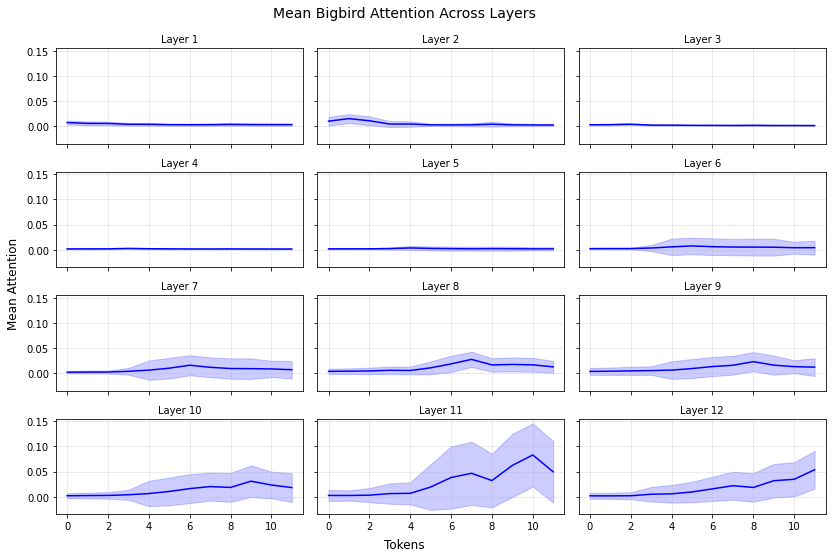

In [25]:
num_samples = 7500
bigbird_max_cls_att = bigbird_concat_max_cls_attentions[:num_samples, :, :]
mean_bigbird_max_cls_att = bigbird_max_cls_att.mean(axis=0)
std_bigbird_max_cls_att = bigbird_max_cls_att.std(axis=0)


# Plot
fig, axes = plt.subplots(4, 3, figsize=(12, 8), sharex=True, sharey=True)
axes = axes.flatten()

for k in range(12):
    ax = axes[k]
    ax.plot(
        np.arange(12),
        mean_bigbird_max_cls_att[k, :],
        label=f"Layer {k + 1}",
        color="blue",
    )
    ax.fill_between(
        np.arange(12),
        mean_bigbird_max_cls_att[k, :] - std_bigbird_max_cls_att[k, :],
        mean_bigbird_max_cls_att[k, :] + std_bigbird_max_cls_att[k, :],
        color="blue",
        alpha=0.2,
    )
    ax.set_title(f"Layer {k + 1}", fontsize=10)
    ax.grid(alpha=0.3)

# Add overall labels and adjust
fig.text(0.5, 0.04, "Tokens", ha="center", fontsize=12)
fig.text(0.04, 0.5, "Mean Attention", va="center", rotation="vertical", fontsize=12)
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
plt.suptitle("Mean Bigbird Attention Across Layers", fontsize=14)
plt.savefig(f'{data_folder}/bigbird_imdb_attention_over_layers.png', bbox_inches='tight', dpi=300, facecolor='white')
plt.show()

In [4]:
longformer_concat_max_cls_attentions = np.load(f"{data_folder}/longformer_concat_max_cls_attentions.npz")["arr_0"]
longformer_concat_max_cls_attentions.shape

(7500, 12, 12)

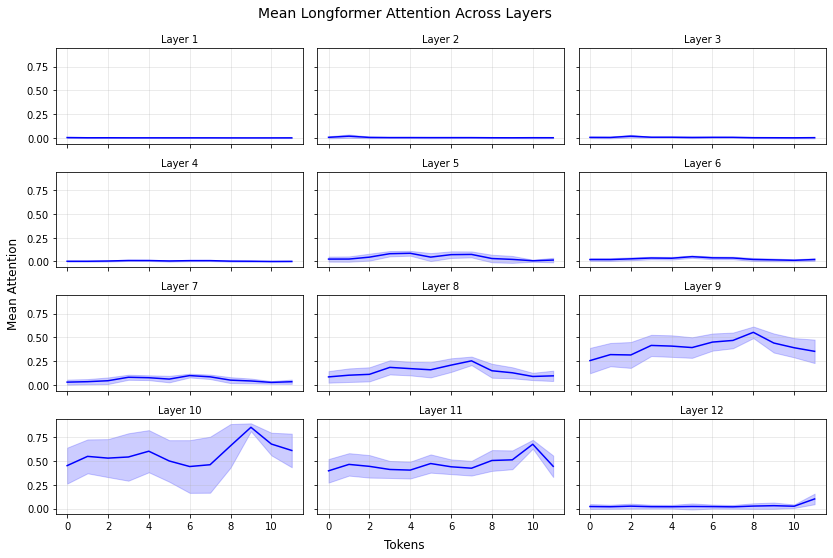

In [6]:
num_samples = 7500
longformer_max_cls_att = np.flip(longformer_concat_max_cls_attentions[:num_samples, :, :], axis=1)
mean_longformer_max_cls_att = longformer_max_cls_att.mean(axis=0)
std_longformer_max_cls_att = longformer_max_cls_att.std(axis=0)


# Plot
fig, axes = plt.subplots(4, 3, figsize=(12, 8), sharex=True, sharey=True)
axes = axes.flatten()

for k in range(12):
    ax = axes[k]
    ax.plot(
        np.arange(12),
        mean_longformer_max_cls_att[k, :],
        label=f"Layer {k + 1}",
        color="blue",
    )
    ax.fill_between(
        np.arange(12),
        mean_longformer_max_cls_att[k, :] - std_longformer_max_cls_att[k, :],
        mean_longformer_max_cls_att[k, :] + std_longformer_max_cls_att[k, :],
        color="blue",
        alpha=0.2,
    )
    ax.set_title(f"Layer {k + 1}", fontsize=10)
    ax.grid(alpha=0.3)

# Add overall labels and adjust
fig.text(0.5, 0.04, "Tokens", ha="center", fontsize=12)
fig.text(0.04, 0.5, "Mean Attention", va="center", rotation="vertical", fontsize=12)
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
plt.suptitle("Mean Longformer Attention Across Layers", fontsize=14)
plt.savefig(f'{data_folder}/longformer_imdb_attention_over_layers.png', bbox_inches='tight', dpi=300, facecolor='white')
plt.show()